# Imports

In [1]:
import datetime as dt
import pandas as pd

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Load the Data

In [2]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


# Convert 'date' Column to Datetime

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
## Set 'date' Column as Index
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Filter Out Required Data

In [5]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## Impute Missing Values

There will be different methods for imputing the missing values for each column.

In [6]:
# find the missing values for each column
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

- For temperature, since there will be such a wide range of values, I will decide to interpolate the missing values. This will take the middle of the values of the preceding and following values and impute them.

In [7]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [8]:
# checking that the missing values have been removed
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

- For rain and snow depth, missing values may be attributed to there being no snow or precipitation for that date, so '0' will be imputed for the missing values.

In [9]:
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [10]:
# checking again for removal of missing values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

- All missing values have been removed from the dataset.

# Question 1: What month had the most precipitation between 2000 through 2010?

## Resample the Data and Set the Frequency to Monthly

In [32]:
# getting a dataframe with just precipitation
precip_cols = ['precipitation','snow_depth']
precip_df  = df.loc["2000":"2010",precip_cols]
precip_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


In [34]:
# setting the frequency to the average monthly
precip_res = precip_df.resample("MS").mean()
precip_res.name = 'Resampled'
precip_res.head()

,precipitation,snow_depth
date,,
2000-01-01,0.461290,0.0
2000-02-01,2.144828,0.0
2000-03-01,0.432258,0.0
2000-04-01,2.393333,0.0
2000-05-01,2.206452,0.0


### Largest Precipitation Day

In [40]:
max_precip_day = precip_df['precipitation'].idxmax()
max_precip_day

Timestamp('2000-10-29 00:00:00')

In [41]:
max_precip = precip_df['precipitation'].max()
max_precip

36.6

In [42]:
max_snow_day = precip_df['snow_depth'].idxmax()
max_snow_day

Timestamp('2009-02-02 00:00:00')

In [43]:
max_snow = precip_df['snow_depth'].max()
max_snow

12.0

In [46]:
print(f"The highest daily preciptation was {max_precip} inches, which occured in {max_precip_day.strftime('%B %Y')}")

The highest daily preciptation was 36.6 inches, which occured in October 2000


## Visualize the Monthly Precipitation

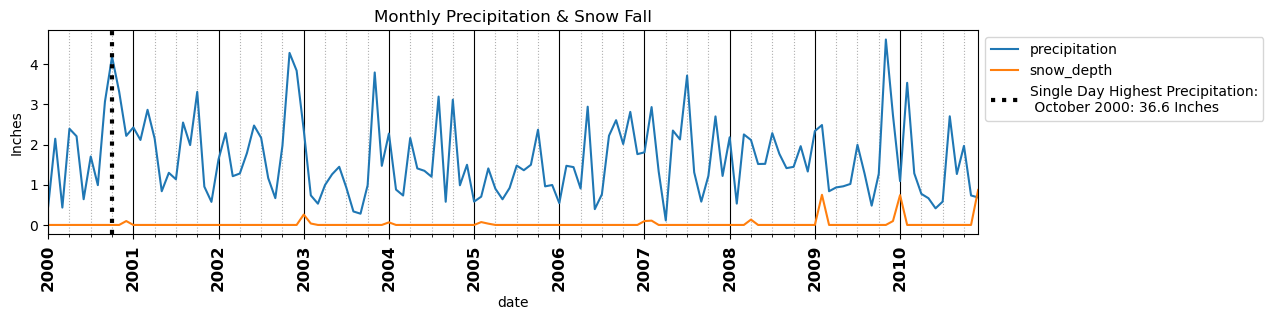

In [63]:
fig, ax = plt.subplots(figsize=(12,3))
precip_res.plot(ax=ax, title='Monthly Precipitation & Snow Fall')
ax.set_ylabel('Inches')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


# add line for max precipitation date
ax.axvline(max_precip_day, label='Single Day Highest Precipitation:\n October 2000: 36.6 Inches',
          color='k',lw=3, ls=':')

##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# add a legend outside of the figure
ax.legend(bbox_to_anchor=(1,1));

# Question 2: Which year between 2000-2020 had the coolest average temperature?

## Resample the Data and Set the Frequency to Yearly

In [64]:
temp_col = ['min_temp']
min_temp_df = df.loc['2000':'2020',temp_col]
min_temp_df

,min_temp
date,
2000-01-01,4.9
2000-01-02,5.0
2000-01-03,7.2
2000-01-04,4.4
2000-01-05,1.9
...,...
2020-12-27,7.6
2020-12-28,-1.3
2020-12-29,1.1


In [67]:
# setting the frequency to the average yearly
temp_res = min_temp_df.resample('AS').mean()
temp_res.name = 'Resampled'
temp_res.head()

,min_temp
date,
2000-01-01,8.001503
2001-01-01,7.647397
2002-01-01,8.425890
2003-01-01,7.895890
2004-01-01,8.234563


## Finding the Max Mean Temperature

In [73]:
max_temp_day = df['max_temp'].idxmax()
max_temp = df['max_temp'].max()

print(f"The hottest day from 2000-2020 was {max_temp_day.strftime('%B %d, %Y')} with a temperature of {max_temp} degrees Celsius.")

The hottest day from 2000-2020 was August 09, 2003 with a temperature of 37.9 degrees Celsius.


### Finding the Min Mean Temperature

In [82]:
min_temp_day = df['min_temp'].idxmin()
min_temp = df['min_temp'].min()

print(f"The coolest day from 2000-2020 was {min_temp_day.strftime('%B %d, %Y')} with a temperature of {min_temp} degrees Celsius.")

The coolest day from 2000-2020 was December 20, 2010 with a temperature of -9.4 degrees Celsius.


## Visualize the Coolest Average Temperature

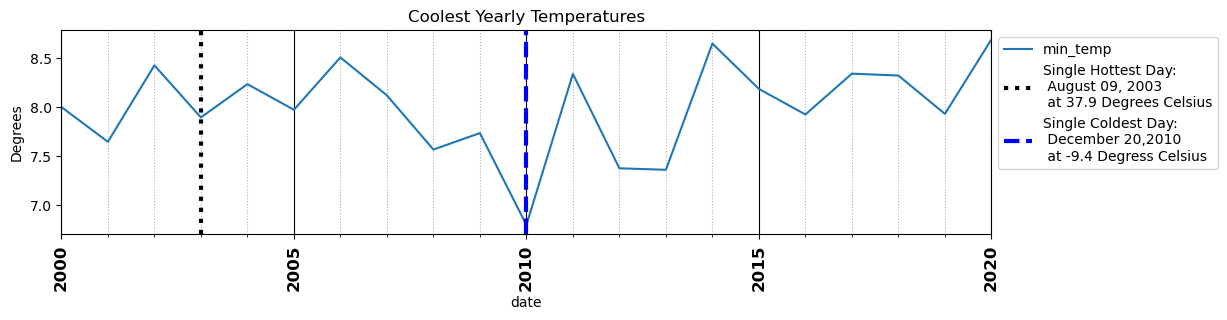

In [83]:
fig, ax = plt.subplots(figsize=(12,3))
temp_res.plot(ax=ax, title='Coolest Yearly Temperatures')
ax.set_ylabel('Degrees')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large',fontweight='bold' )


# add line for max precipitation date
ax.axvline(max_temp_day, label='Single Hottest Day:\n August 09, 2003\n at 37.9 Degrees Celsius',
          color='k',lw=3, ls=':')
ax.axvline(min_temp_day, label='Single Coldest Day:\n December 20,2010\n at -9.4 Degress Celsius',
          color='b',lw=3, ls='--')
##  Making major/minor gridlines visually distince
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# add a legend outside of the figure
ax.legend(bbox_to_anchor=(1,1));